<a href="https://colab.research.google.com/github/LShahmiri/Dynamic-System-in-Biology/blob/main/Somatic_Evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

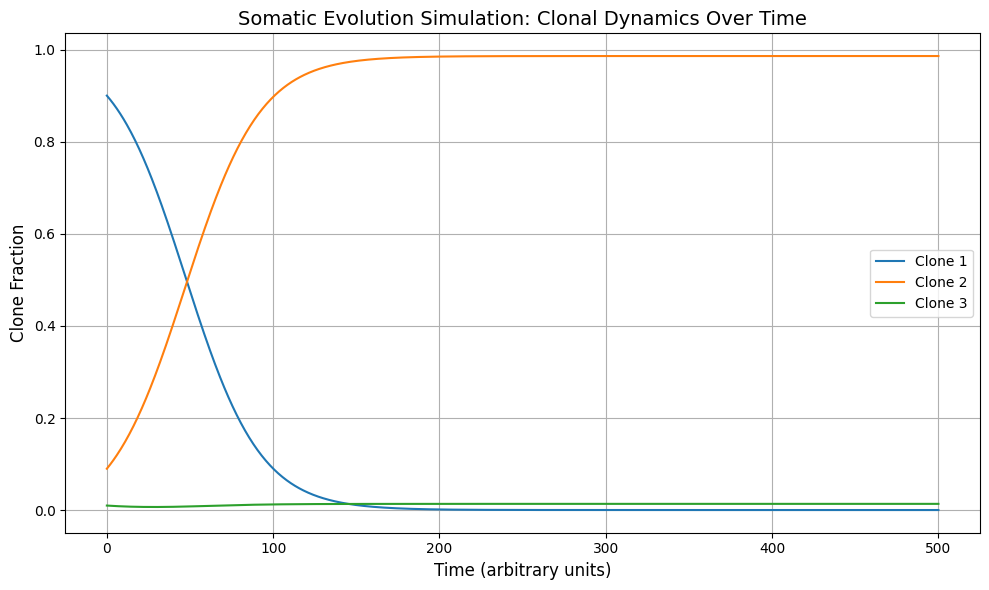

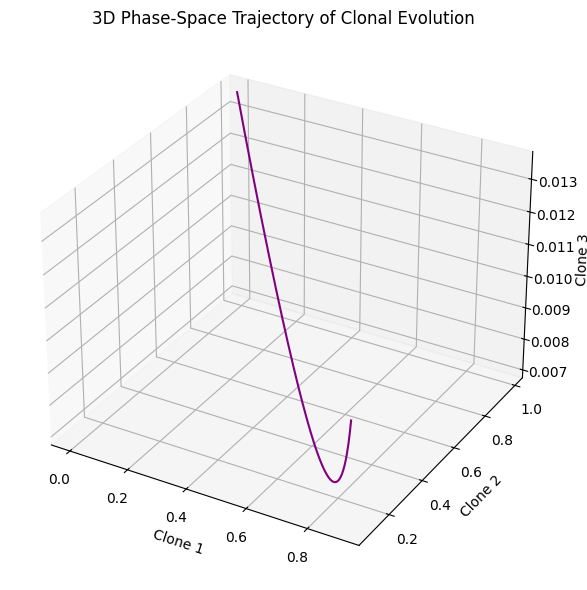

In [1]:
"""
Somatic Evolution: Clonal Dynamics Simulation
----------------------------------------------
This script models the expansion and competition of multiple cell clones
in a dynamic biological system, such as somatic evolution during ageing or
tumor initiation. It demonstrates how selection, mutation, and stochasticity
shape clonal population trajectories over time.

The model uses a deterministic differential equation framework with stochastic
mutation events. It can be extended for fitting to real NGS or single-cell data.

"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# -----------------------------------------------------------
# Define model parameters
# -----------------------------------------------------------
n_clones = 3                # Number of cell clones
growth_rates = np.array([0.10, 0.12, 0.08])  # Intrinsic growth rate of each clone
fitness_advantage = np.array([1.0, 1.2, 0.9]) # Selection coefficients
mutation_rate = 1e-3        # Probability of mutation per generation
t = np.linspace(0, 500, 1000)  # Simulation time points

# Initial population of each clone (fractions)
initial_state = np.array([0.9, 0.09, 0.01])


# -----------------------------------------------------------
# Define the system of differential equations
# -----------------------------------------------------------
def clonal_dynamics(y, t, growth_rates, fitness_advantage, mutation_rate):
    """
    Models the temporal evolution of clone fractions under selection and mutation.

    Parameters
    ----------
    y : array
        Current clone fractions.
    t : float
        Time.
    growth_rates : array
        Intrinsic replication rate for each clone.
    fitness_advantage : array
        Selection factor for each clone ( >1 = positive selection ).
    mutation_rate : float
        Mutation probability per generation.

    Returns
    -------
    dydt : array
        Rate of change of clone fractions.
    """
    total_growth = np.sum(growth_rates * fitness_advantage * y)
    dydt = y * (growth_rates * fitness_advantage - total_growth)

    # Introduce stochastic mutation between clones
    mutation_flux = mutation_rate * (np.roll(y, 1) - y)
    dydt += mutation_flux
    return dydt


# -----------------------------------------------------------
# Solve the system using numerical integration
# -----------------------------------------------------------
solution = odeint(clonal_dynamics, initial_state, t, args=(growth_rates, fitness_advantage, mutation_rate))
solution = np.clip(solution, 0, 1)
solution = solution / np.sum(solution, axis=1)[:, None]  # Normalise to total population = 1


# -----------------------------------------------------------
# Plot clone dynamics over time
# -----------------------------------------------------------
plt.figure(figsize=(10, 6))
for i in range(n_clones):
    plt.plot(t, solution[:, i], label=f"Clone {i+1}")
plt.title("Somatic Evolution Simulation: Clonal Dynamics Over Time", fontsize=14)
plt.xlabel("Time (arbitrary units)", fontsize=12)
plt.ylabel("Clone Fraction", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# -----------------------------------------------------------
# Visualise the evolutionary trajectory in phase space
# -----------------------------------------------------------
if n_clones == 3:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(solution[:, 0], solution[:, 1], solution[:, 2], color='purple')
    ax.set_xlabel("Clone 1")
    ax.set_ylabel("Clone 2")
    ax.set_zlabel("Clone 3")
    ax.set_title("3D Phase-Space Trajectory of Clonal Evolution")
    plt.tight_layout()
    plt.show()
